In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
# Define the path to your CSV file in Google Drive
csv_file_path = "/content/drive/MyDrive/BBM409_datasets/star_classification.csv"

# Read the CSV file using pandas
df = pd.read_csv(csv_file_path)

# Pre-processing

In [78]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [79]:
df.dtypes

# Columns are mostly numeric, we will encode "class" column

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [80]:
df.info()

# There is no missing value as seen, so no need to fill null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [81]:
df = df.drop(['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID'], axis=1)

In [82]:
df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class',
       'redshift', 'plate', 'MJD'],
      dtype='object')

In [83]:
# Encoding categorical data ('class')
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [84]:
df.head(10)

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0,0.116123,6121,56187
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,3,1,1.424659,5026,55855
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,2,1,0.586455,11069,58456
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,2,0,0.477009,6183,56210
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,5,0,0.660012,6625,56386
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,4,2,-0.000008,2444,54082


In [86]:
# applying scaling, values will be scaled between 0-1
min_max_scaler = MinMaxScaler()

cols_to_scale = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift', 'plate', 'MJD']

df[cols_to_scale] = min_max_scaler.fit_transform(df[cols_to_scale])

In [87]:
correlation_matrix = df.corr()

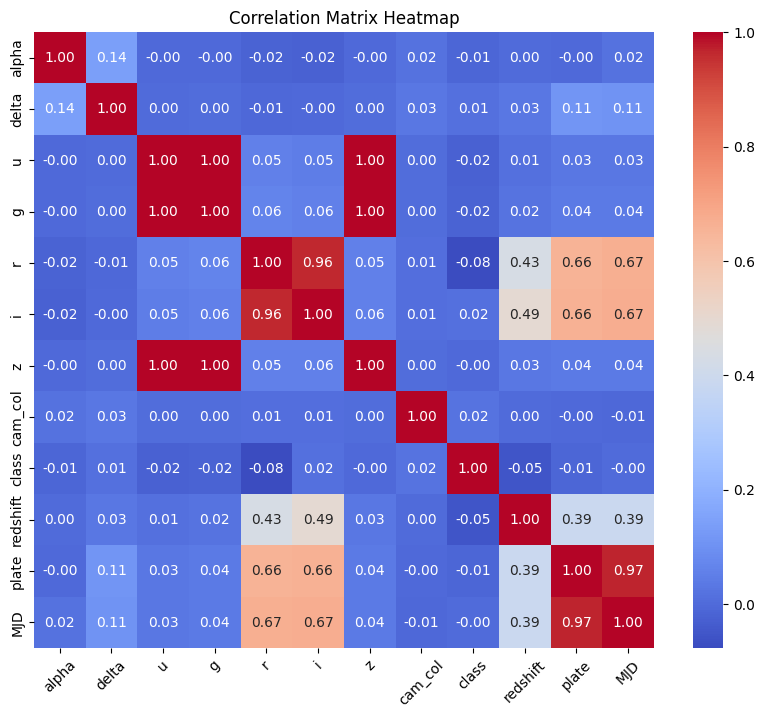

In [88]:
plt.figure(figsize=(10, 8))

# Create the heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()

# Split the Dataset

### Option.1 : Train-Test Split

In [90]:
X = df.drop(columns=["class"])  # exclude the target variable 'class'
y = df["class"] # target variable 'class'

# split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Option.2 : k-Fold Cross Validation (5-folds)

In [91]:
# Create a 5-fold cross-validation splitter
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# models will be evaluated with code below
# scores = cross_val_score(model, X, y, cv=kf)

In [92]:
def calculate_metrics(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  return accuracy, precision, recall, f1

In [93]:
def calculate_mean_metrics(accuracies, precisions, recalls, f1s):
  mean_accuracy = sum(accuracies) / len(accuracies)
  mean_precision = sum(precisions) / len(precisions)
  mean_recall = sum(recalls) / len(recalls)
  mean_f1 = sum(f1s) / len(f1s)

  return mean_accuracy, mean_precision, mean_recall, mean_f1

# Classification Methods

## 1. with Train-Test Split

In [94]:
# kNN
#create the knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict on the test set
y_pred_knn = knn.predict(X_test)

accuracy_knn, precision_knn, recall_knn, f1_knn = calculate_metrics(y_test, y_pred_knn)

In [95]:
# Naive Bayes
# create the naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# predict on the test set
y_pred_nb = nb.predict(X_test)

accuracy_nb, precision_nb, recall_nb, f1_nb = calculate_metrics(y_test, y_pred_nb)

In [96]:
# Random Forest
# Create the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate Random Forest metrics
accuracy_rf, precision_rf, recall_rf, f1_rf = calculate_metrics(y_test, y_pred_rf)

In [97]:
# Support Vector Machines (SVM)
# Create the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Calculate SVM metrics
accuracy_svm, precision_svm, recall_svm, f1_svm = calculate_metrics(y_test, y_pred_svm)

In [100]:
print("Classification Results with Train-Test Split")
print(f"\t \t kNN \t \t Naive Bayes \t Random Forest \t SVM")
print(f"Accuracy: \t {accuracy_knn:.4f} \t {accuracy_nb:.4f} \t {accuracy_rf:.4f} \t {accuracy_svm:.4f}")
print(f"Precision: \t {precision_knn:.4f} \t {precision_nb:.4f} \t {precision_rf:.4f} \t {precision_svm:.4f}")
print(f"Recall: \t {recall_knn:.4f} \t {recall_nb:.4f} \t {recall_rf:.4f} \t {recall_svm:.4f}")
print(f"F1-Score: \t {f1_knn:.4f} \t {f1_nb:.4f} \t {f1_rf:.4f} \t {f1_svm:.4f}")


Classification Results with Train-Test Split
	 	 kNN 	 	 Naive Bayes 	 Random Forest 	 SVM
Accuracy: 	 0.9092 	 0.7201 	 0.9772 	 0.9417
Precision: 	 0.9110 	 0.7745 	 0.9771 	 0.9423
Recall: 	 0.9092 	 0.7201 	 0.9772 	 0.9417
F1-Score: 	 0.9083 	 0.6734 	 0.9771 	 0.9413


## 2. 5-fold Cross-validation

In [101]:
# Create and train kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# lists for knn
accuracies_knn = []
precisions_knn = []
recalls_knn = []
f1_scores_knn = []

# perform cross validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_knn)

    accuracies_knn.append(accuracy_fold)
    precisions_knn.append(precision_fold)
    recalls_knn.append(recall_fold)
    f1_scores_knn.append(f1_fold)

mean_acc_knn, mean_prec_knn, mean_rec_knn, mean_f1_knn = calculate_mean_metrics(accuracies_knn, precisions_knn, recalls_knn, f1_scores_knn)


In [102]:
# Create and train Naive Bayes model
nb = GaussianNB()

# lists for nb
accuracies_nb = []
precisions_nb = []
recalls_nb = []
f1_scores_nb = []

# perform cross validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_knn)

    accuracies_nb.append(accuracy_fold)
    precisions_nb.append(precision_fold)
    recalls_nb.append(recall_fold)
    f1_scores_nb.append(f1_fold)

mean_acc_nb, mean_prec_nb, mean_rec_nb, mean_f1_nb = calculate_mean_metrics(accuracies_nb, precisions_nb, recalls_nb, f1_scores_nb)


In [103]:
# Create the Random Forest model

rf = RandomForestClassifier(n_estimators=100, random_state=42)

accuracies_rf = []
precisions_rf = []
recalls_rf = []
f1_scores_rf = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_rf)

    accuracies_rf.append(accuracy_fold)
    precisions_rf.append(precision_fold)
    recalls_rf.append(recall_fold)
    f1_scores_rf.append(f1_fold)

mean_acc_rf, mean_prec_rf, mean_rec_rf, mean_f1_rf = calculate_mean_metrics(accuracies_rf, precisions_rf, recalls_rf, f1_scores_rf)


In [104]:
# Support Vector Machines (SVM) within 5-fold cross-validation

accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm = SVC(kernel='linear', C=1.0, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)

    accuracy_fold, precision_fold, recall_fold, f1_fold = calculate_metrics(y_test, y_pred_svm)

    accuracies_svm.append(accuracy_fold)
    precisions_svm.append(precision_fold)
    recalls_svm.append(recall_fold)
    f1_scores_svm.append(f1_fold)

mean_acc_svm, mean_prec_svm, mean_rec_svm, mean_f1_svm = calculate_mean_metrics(accuracies_svm, precisions_svm, recalls_svm, f1_scores_svm)


In [106]:
print("Classification Results with 5-fold Cross-Validation")
print(f"\t \t kNN \t \t Naive Bayes \t Random Forest \t SVM")
print(f"Accuracy: \t {mean_acc_knn:.4f} \t {mean_acc_nb:.4f} \t {mean_acc_rf:.4f} \t {mean_acc_svm:.4f}")
print(f"Precision: \t {mean_prec_knn:.4f} \t {mean_prec_nb:.4f} \t {mean_prec_rf:.4f} \t {mean_prec_svm:.4f}")
print(f"Recall: \t {mean_rec_knn:.4f} \t {mean_rec_nb:.4f} \t {mean_rec_rf:.4f} \t {mean_rec_svm:.4f}")
print(f"F1-Score: \t {mean_f1_knn:.4f} \t {mean_f1_nb:.4f} \t {mean_f1_rf:.4f} \t {mean_f1_svm:.4f}")


Classification Results with 5-fold Cross-Validation
	 	 kNN 	 	 Naive Bayes 	 Random Forest 	 SVM
Accuracy: 	 0.9115 	 0.9115 	 0.9777 	 0.9405
Precision: 	 0.9132 	 0.9132 	 0.9776 	 0.9412
Recall: 	 0.9115 	 0.9115 	 0.9777 	 0.9405
F1-Score: 	 0.9106 	 0.9106 	 0.9775 	 0.9401


# Explanations and Plots

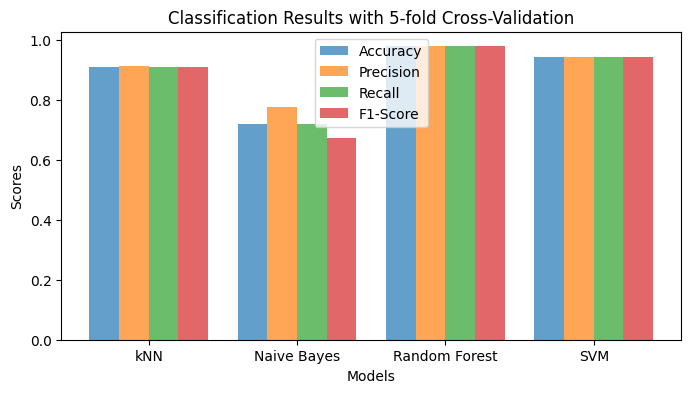

In [112]:
# Scrores of train-test split
models = ['kNN', 'Naive Bayes', 'Random Forest', 'SVM']
accuracy = [accuracy_knn, accuracy_nb, accuracy_rf, accuracy_svm]
precision = [precision_knn, precision_nb, precision_rf, precision_svm]
recall = [recall_knn, recall_nb, recall_rf, recall_svm]
f1_score = [f1_knn, f1_nb, f1_rf, f1_svm]


bar_width = 0.2
x = range(len(models))
plt.figure(figsize=(8, 4))

plt.bar(x, accuracy, width=bar_width, label='Accuracy', align='center', alpha=0.7)
plt.bar([i + bar_width for i in x], precision, width=bar_width, label='Precision', align='center', alpha=0.7)
plt.bar([i + 2*bar_width for i in x], recall, width=bar_width, label='Recall', align='center', alpha=0.7)
plt.bar([i + 3*bar_width for i in x], f1_score, width=bar_width, label='F1-Score', align='center', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Classification Results with 5-fold Cross-Validation')
plt.xticks([i + 1.5 * bar_width for i in x], models)
plt.legend()
plt.show()


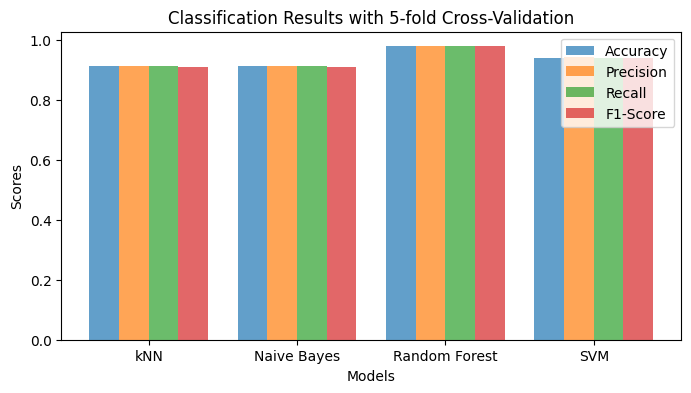

In [111]:
# Scrores of 5-fold cross validation
models = ['kNN', 'Naive Bayes', 'Random Forest', 'SVM']
accuracy = [mean_acc_knn,mean_acc_nb,mean_acc_rf,mean_acc_svm]
precision = [mean_prec_knn,mean_prec_nb,mean_prec_rf,mean_prec_svm]
recall = [mean_rec_knn, mean_rec_nb, mean_rec_rf, mean_rec_svm]
f1_score = [mean_f1_knn, mean_f1_nb, mean_f1_rf, mean_f1_svm]

bar_width = 0.2
x = range(len(models))
plt.figure(figsize=(8, 4))

plt.bar(x, accuracy, width=bar_width, label='Accuracy', align='center', alpha=0.7)
plt.bar([i + bar_width for i in x], precision, width=bar_width, label='Precision', align='center', alpha=0.7)
plt.bar([i + 2*bar_width for i in x], recall, width=bar_width, label='Recall', align='center', alpha=0.7)
plt.bar([i + 3*bar_width for i in x], f1_score, width=bar_width, label='F1-Score', align='center', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Classification Results with 5-fold Cross-Validation')
plt.xticks([i + 1.5 * bar_width for i in x], models)
plt.legend()
plt.show()


In the 5-fold Cross-Validation results, we can see that Random Forest achieved the highest Accuracy, Precision, Recall, and F1-Score. On the other hand, Naive Bayes and kNN performed consistently but slightly lower in terms of metrics. SVM also performed well, but not as high as Random Forest.

In the Train-Test Split results, Random Forest still performs exceptionally well with high Accuracy, Precision, Recall, and F1-Score. SVM also remains competitive. However, the performance of kNN and Naive Bayes dropped noticeably, especially in terms of Accuracy and Precision.

### 5-fold Cross-Validation:

Because Random Forest is so good at handling complicated data relationships and combining decision trees, it performs the best across all metrics in the 5-fold Cross-Validation. Both Naive Bayes and kNN, which depend on probabilistic concepts and kNN is an intuitive algorithm, routinely outperform each other but do so slightly less well. SVM locates the optimal hyperplane for class separation while providing a good balance of metrics.

### Train - Test Split

Random Forest's strength is seen in the Train-Test Split scenario, where it continually performs well, indicating that it is capable of handling changes in data distribution. On the other hand, Naive Bayes and kNN seem to be more vulnerable to splits in the data, which leads to inconsistent performance across the measures. SVM is a dependable option for the dataset in both situations since it consistently and competitively finds a hyperplane that maximizes class separation.